In [1]:
import mne
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Load your EEG dataset
# Replace 'your_dataset.edf' with the path to your EEG data file
raw = mne.io.read_raw_edf('C:\\Users\\BASAVA\\Desktop\\DASPS_Database\\DASPS_Database\\Raw data .edf\\S01.edf',preload=True)

Extracting EDF parameters from C:\Users\BASAVA\Desktop\DASPS_Database\DASPS_Database\Raw data .edf\S01.edf...
EDF file detected
Setting channel info structure...


Creating raw.info structure...
Reading 0 ... 42111  =      0.000 ...   328.992 secs...


In [9]:
# Check the loaded channel names
print("Loaded channels:", raw.ch_names)

Loaded channels: ['COUNTER', 'INTERPOLATED', 'AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'RAW_CQ', 'CQ_AF3', 'CQ_F7', 'CQ_F3', 'CQ_FC5', 'CQ_T7', 'CQ_P7', 'CQ_O1', 'CQ_O2', 'CQ_P8', 'CQ_T8', 'CQ_FC6', 'CQ_F4', 'CQ_F8', 'CQ_AF4', 'CQ_CMS', 'CQ_DRL', 'GYROX', 'GYROY', 'MARKER']


In [10]:
# Specify the EEG channels you're interested in
eeg_channels = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']

In [11]:
# Filter the data to extract specific frequency bands
alpha_filtered = raw.copy().filter(8, 12, picks=eeg_channels, fir_design='firwin')  # Alpha band (8-12 Hz)
beta_filtered = raw.copy().filter(13, 30, picks=eeg_channels, fir_design='firwin')  # Beta band (13-30 Hz)
gamma_filtered = raw.copy().filter(30, 63, picks=eeg_channels, fir_design='firwin')  # Gamma band (30-64 Hz)



Filtering a subset of channels. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 213 samples (1.664 s)

Filtering a subset of channels. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain desig

Using matplotlib as 2D backend.


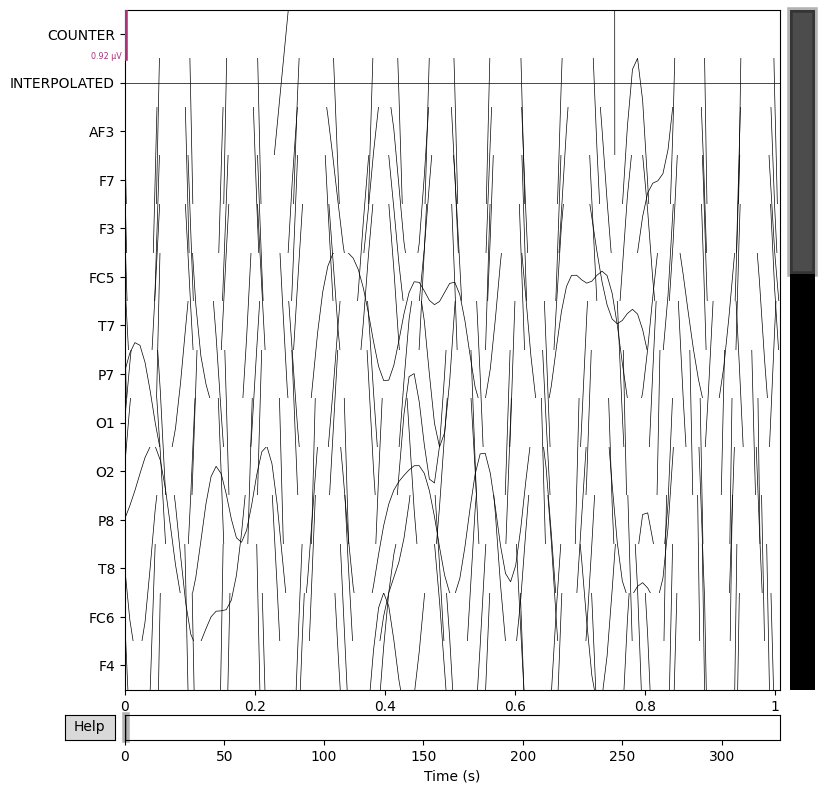

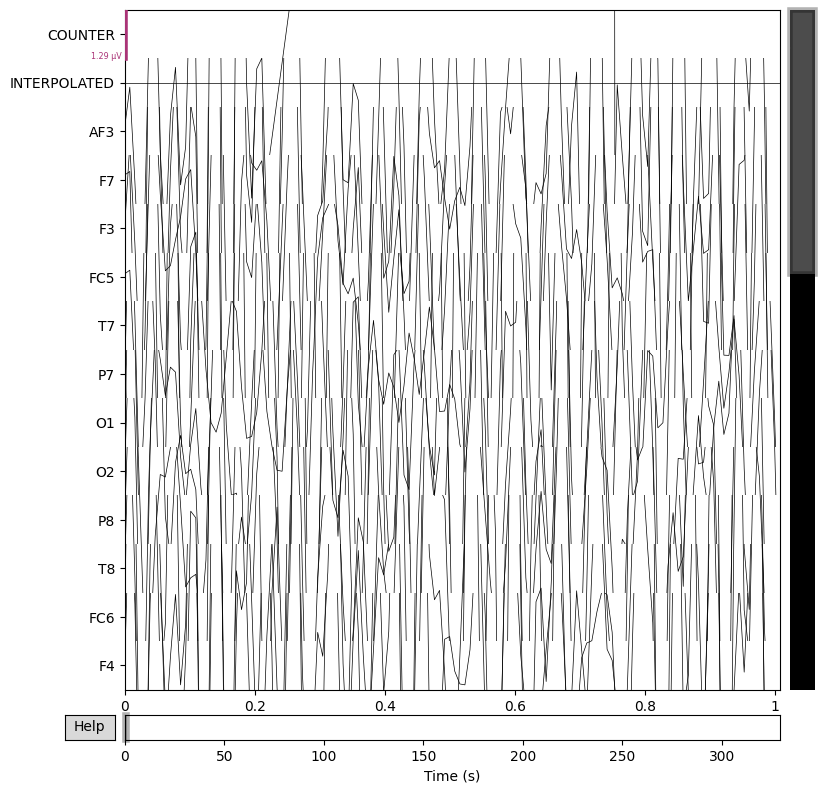

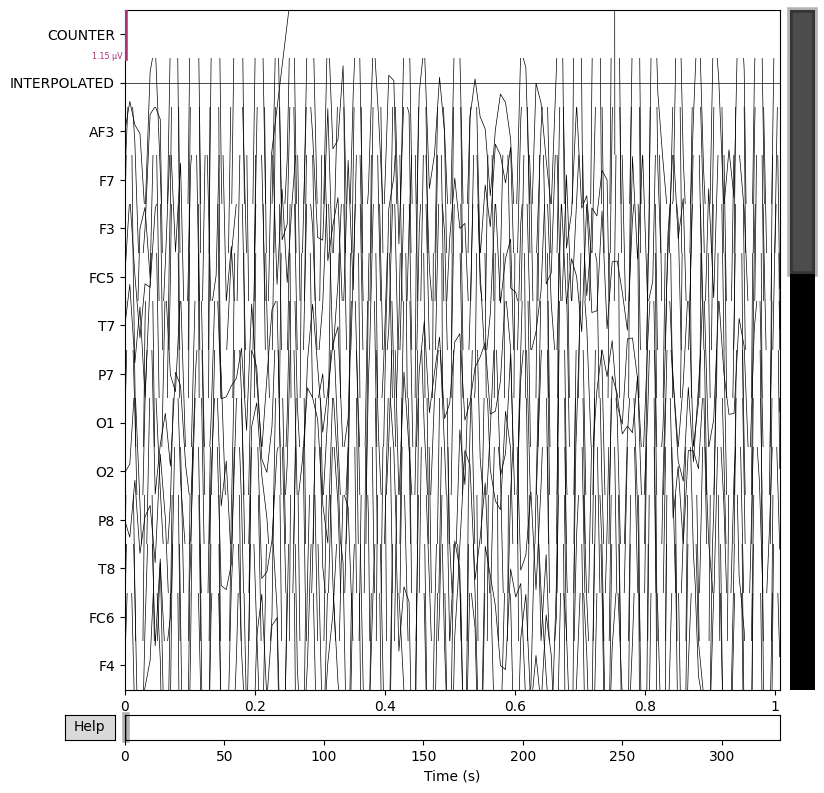

In [12]:
# Plot the EEG data in specific frequency bands
alpha_filtered.plot(duration=1, n_channels=len(eeg_channels), scalings='auto', title='Alpha Band (8-12 Hz)')
beta_filtered.plot(duration=1, n_channels=len(eeg_channels), scalings='auto', title='Beta Band (13-30 Hz)')
gamma_filtered.plot(duration=1, n_channels=len(eeg_channels), scalings='auto', title='Gamma Band (30-64 Hz)')

plt.show()